<a href="https://colab.research.google.com/github/Prayag79/poisson_for_flightcrash/blob/main/flight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv("/content/Plane Crashes.csv")
df.head(50)

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown
5,1918-07-14,NaN,Fairey III,Marine Aeroplane Depot,N2851,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Isle of Grain - Usworth - Glasgow,...,United Kingdom,Europe,1.0,1.0,0.0,0.0,0.0,1,The pilot departed Isle of Grain on a delivery...,Unknown
6,1918-07-18,NaN,De Havilland DH.6,Royal Air Force - RAF,B3087,Flight,Training,No,Airport (less than 10 km from airport),Seaton Carew - Seaton Carew,...,United Kingdom,Europe,2.0,2.0,0.0,0.0,0.0,2,The crew was completing a local training fligh...,Unknown
7,1918-08-19,15H 15M 0S,Handley Page H.P.12,Royal Air Force - RAF,D4593,Flight,Test,No,"Plain, Valley",Castle Bromwich - Castle Bromwich,...,United Kingdom,Europe,2.0,2.0,5.0,5.0,0.0,7,The aircraft departed Castle Bromwich for a te...,Technical failure
8,1918-08-23,NaN,Tellier T.3,Portuguese Air Force - Aeronáutica Militar,5,Flight,Survey / Patrol / Reconnaissance,No,"Lake, Sea, Ocean, River",NaN,...,Portugal,Europe,2.0,2.0,0.0,0.0,0.0,2,The seaplane crashed in unknown circumstances ...,Unknown
9,1918-08-26,NaN,Blackburn R.T.1 Kangaroo,Royal Air Force - RAF,B9976,Landing (descent or approach),Military,Yes,Airport (less than 10 km from airport),Seaton Carew AFB - Seaton Carew AFB,...,United Kingdom,Europe,2.0,0.0,0.0,0.0,0.0,0,"On final approach in bad visibility, aircraft ...",Unknown


In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

In [5]:
count_phase = df['Flight phase'].value_counts()
print(count_phase)

Flight phase
Flight                           11475
Landing (descent or approach)    10023
Takeoff (climb)                   6052
Taxiing                            236
Parking                            112
Name: count, dtype: int64


In [8]:
df['Flight phase'] = df['Flight phase'].str.lower().str.strip()
takeoff_df = df[df['Flight phase'] == 'takeoff (climb)']


In [9]:
takeoff_per_year = takeoff_df['Year'].value_counts().sort_index()
takeoff_per_year

,count
Year,
1918,4
1919,11
1920,32
1921,40
1922,21
...,...
2018,31
2019,33
2020,27


In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


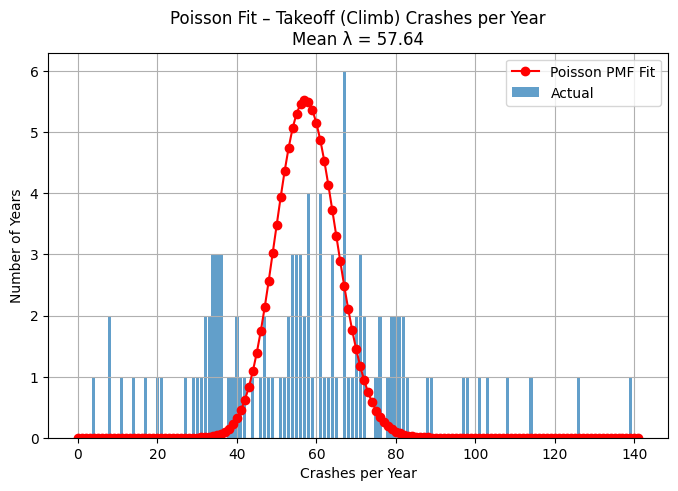

In [13]:
counts = takeoff_per_year.values
λ = np.mean(counts)
x = np.arange(0, max(counts) + 3)
pmf = stats.poisson.pmf(x, mu=λ)

actual_freq = pd.Series(counts).value_counts().sort_index().reindex(x, fill_value=0)

# Plot
plt.figure(figsize=(8,5))
plt.bar(x, actual_freq, label='Actual', alpha=0.7)
plt.plot(x, pmf * len(counts), 'ro-', label='Poisson PMF Fit')
plt.title(f"Poisson Fit – Takeoff (Climb) Crashes per Year\nMean λ = {λ:.2f}")
plt.xlabel("Crashes per Year")
plt.ylabel("Number of Years")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error

expected = pmf * len(counts)
mse = mean_squared_error(actual_freq, expected)
print(f"Mean Squared Error of Poisson Fit: {mse:.4f}")


Mean Squared Error of Poisson Fit: 1.8595
